In [1]:
# a) Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns

In [2]:
# b) Import data
data = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")

In [3]:
# Describe data
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# c) Drop User ID
data = data.drop("User ID", axis=1)

In [5]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
# e) By taking purchased as the target variable you will make a decision tree having 3 levels
# Fit decision tree with Purchased as dependent variable
X = data.drop("Purchased", axis=1)
Y = data["Purchased"]

In [7]:
# Map gender to binary code
X["Gender"] = X["Gender"].map({"Male": 0, "Female": 1})

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
# Get training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8)
print(len(xTrain))
print(len(xTest))

320
80


In [10]:
# Fit model
modelTree = tree.DecisionTreeClassifier(max_depth = 3).fit(xTrain, yTrain)
modelTree

DecisionTreeClassifier(max_depth=3)

In [11]:
# Predict outcome
yPred = modelTree.predict(xTest)

In [12]:
yPredTree = modelTree.predict(xTest)

In [13]:
# View results of prediction using count of 0's and 1's
pd.Series(yPredTree).value_counts()

0    44
1    36
Name: count, dtype: int64

In [14]:
# f) You will use dictionary to separate columns (actual and predicted)
result = pd.DataFrame({"Actual": yTest, "Predicted": yPredTree})
result

,Actual,Predicted
40,0,0
156,0,1
28,0,0
342,0,0
104,0,0
...,...,...
279,1,1
47,0,0
255,1,1
239,1,1


In [15]:
# g) Create feature names Gender, Age and Estimated Salary and class names as
# purchased and not purchased
feature_names = ["Gender", "Age", "Estimated Salary"]
class_names = ["Purchased", "Not Purchased"]


In [16]:
# h) Determine the performance of the tree through performance measurements:
# Accuracy, Recall, Precision, ROC Curve, Confusion Matrix (Need to generate the
# matrix through heatmap) , and K-fold cross validation

# Start with accuracy, recall, precision
accuracyTree = metrics.accuracy_score(yTest, yPredTree)
print("Accuracy: ", accuracyTree)

recall = metrics.recall_score(yTest, yPredTree)
print("Recall: ", recall)

precision = metrics.precision_score(yTest, yPredTree)
print("Precision: ", precision)

Accuracy:  0.9
Recall:  0.9666666666666667
Precision:  0.8055555555555556


[[43  7]
 [ 1 29]]


<Axes: >

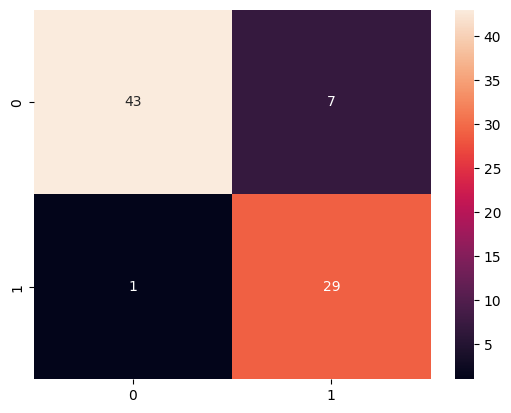

In [17]:
# Generate confusion matrix with heatmap
confusionMatrix = metrics.confusion_matrix(yTest, yPredTree)
print(confusionMatrix)
sns.heatmap(confusionMatrix, annot = True)

AUC:  0.9133333333333333


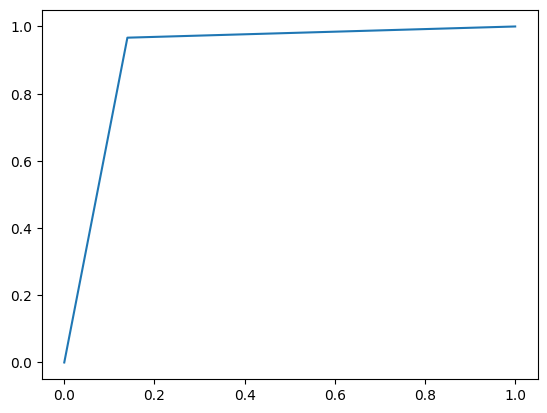

In [18]:
# Generate ROC curve and AUC
aucTree = metrics.roc_auc_score(yTest, yPredTree)
print("AUC: ", aucTree)

# Need to get false and true positive rates, then plot
falsePos, truePos, thresh = metrics.roc_curve(yTest, yPredTree)
plt.plot(falsePos, truePos)

In [19]:
# k-fold cross validation
kfTree = KFold(n_splits = 5, shuffle = True) # 5 splits is chosen since it's common
cvTree = cross_val_score(modelTree, X, Y, cv = kfTree)
np.mean(cvTree)

0.9

In [20]:
# i) Classify the same data (taking Purchased as the target variable)
# implementing logistic regression
from sklearn.linear_model import LogisticRegression

In [21]:
# Fit logistic regression with same parameters as decision tree
modelLogReg = LogisticRegression(solver = 'liblinear').fit(xTrain, yTrain)
yPredLogReg = modelLogReg.predict(xTest)

# View results of prediction using count of 0's and 1's
pd.Series(yPredLogReg).value_counts()

0    80
Name: count, dtype: int64

In [22]:
result = pd.DataFrame({"Actual": yTest, "Predicted": yPredLogReg})
result

,Actual,Predicted
40,0,0
156,0,0
28,0,0
342,0,0
104,0,0
...,...,...
279,1,0
47,0,0
255,1,0
239,1,0


In [23]:
# Determine the performance of the tree through performance measurements:
# Accuracy, Recall, Precision, ROC Curve, Confusion Matrix (Need to generate the
# matrix through heatmap) , and K-fold cross validation

# Start with accuracy, recall, precision
accuracyLogReg = metrics.accuracy_score(yTest, yPredLogReg)
print("Accuracy: ", accuracyLogReg)

recall = metrics.recall_score(yTest, yPredLogReg)
print("Recall: ", recall)

precision = metrics.precision_score(yTest, yPredLogReg)
print("Precision: ", precision)

Accuracy:  0.625
Recall:  0.0
Precision:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[50  0]
 [30  0]]


<Axes: >

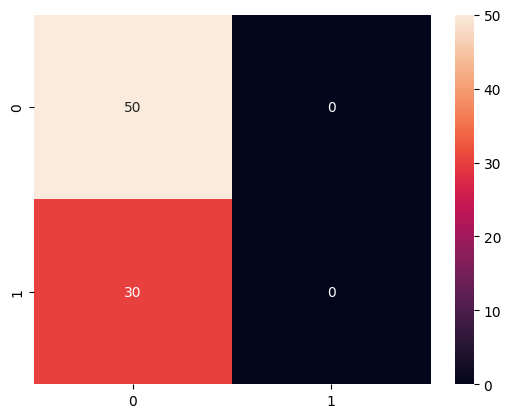

In [24]:
# Generate confusion matrix with heatmap
confusionMatrix = metrics.confusion_matrix(yTest, yPredLogReg)
print(confusionMatrix)
sns.heatmap(confusionMatrix, annot = True)

AUC:  0.5


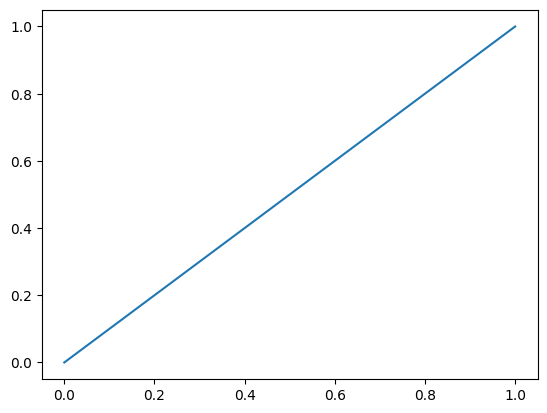

In [25]:
# Generate ROC curve and AUC
aucLogReg = metrics.roc_auc_score(yTest, yPredLogReg)
print("AUC: ", aucLogReg)

# Need to get false and true positive rates, then plot
falsePos, truePos, thresh = metrics.roc_curve(yTest, yPredLogReg)
plt.plot(falsePos, truePos)

In [26]:
# k-fold cross validation
kfLogReg = KFold(n_splits = 5, shuffle = True) # 5 splits is chosen since it's common
cvLogReg = cross_val_score(modelLogReg, X, Y, cv = kfLogReg)
np.mean(cvLogReg)

0.6425000000000001

In [27]:
# k) Implement SVM model
from sklearn import svm

In [28]:
modelSvm = svm.SVC(kernel = 'linear').fit(xTrain, yTrain)
yPredSvm = modelSvm.predict(xTest)

# View results of prediction using count of 0's and 1's
pd.Series(yPredSvm).value_counts()

0    49
1    31
Name: count, dtype: int64

In [29]:
result = pd.DataFrame({"Actual": yTest, "Predicted": yPredSvm})
result

,Actual,Predicted
40,0,0
156,0,1
28,0,0
342,0,0
104,0,0
...,...,...
279,1,1
47,0,0
255,1,1
239,1,1


In [30]:
# Determine the performance of the tree through performance measurements:
# Accuracy, Recall, Precision, ROC Curve, Confusion Matrix (Need to generate the
# matrix through heatmap) , and K-fold cross validation

# Start with accuracy, recall, precision
accuracySvm = metrics.accuracy_score(yTest, yPredSvm)
print("Accuracy: ", accuracySvm)

recall = metrics.recall_score(yTest, yPredSvm)
print("Recall: ", recall)

precision = metrics.precision_score(yTest, yPredSvm)
print("Precision: ", precision)

Accuracy:  0.8375
Recall:  0.8
Precision:  0.7741935483870968


[[43  7]
 [ 6 24]]


<Axes: >

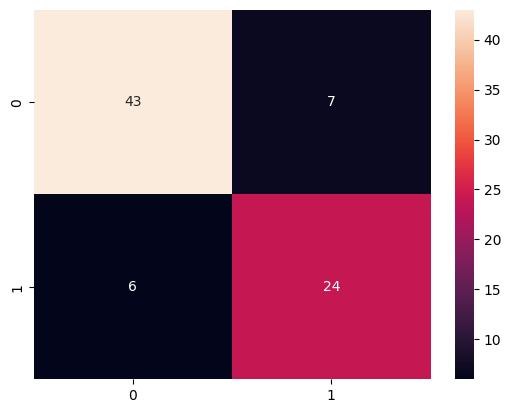

In [31]:
# Generate confusion matrix with heatmap
confusionMatrix = metrics.confusion_matrix(yTest, yPredSvm)
print(confusionMatrix)
sns.heatmap(confusionMatrix, annot = True)

AUC:  0.8300000000000001


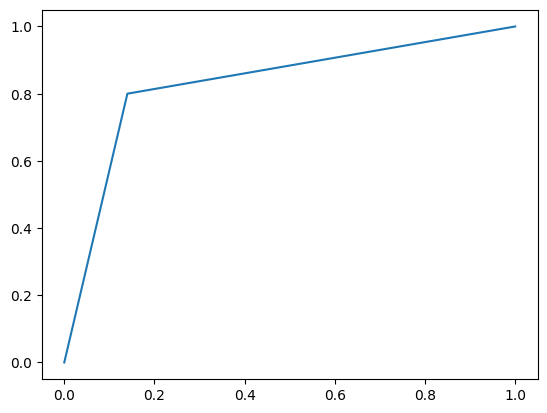

In [32]:
# Generate ROC curve and AUC
aucSvm = metrics.roc_auc_score(yTest, yPredSvm)
print("AUC: ", aucSvm)

# Need to get false and true positive rates, then plot
falsePos, truePos, thresh = metrics.roc_curve(yTest, yPredSvm)
plt.plot(falsePos, truePos)

In [ ]:
# k-fold cross validation
kfSvm = KFold(n_splits = 5, shuffle = True) # 5 splits is chosen since it's common
cvSvm = cross_val_score(modelSvm, X, Y, cv = kfSvm)
np.mean(cvSvm)

In [ ]:
# m) By taking the accuracy scores plot the accuracy score comparison graph of
# the models and determine which model did better. You can use any color for
# your markers. The graph should have legends, title, x-label and y-label
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
y = [accuracyLogReg, accuracySvm,accuracyTree]
plt.plot([1,2,3], y, color = "black")
plt.scatter(1,accuracyLogReg, marker = "o", color = "purple", label = "Logit")
plt.scatter(2,accuracySvm, marker = "o", color = "blue", label = "SVM")
plt.scatter(3,accuracyTree, marker = "o", color = "red", label = "Decision Tree")
plt.legend()
plt.show()